VIII Auswertung
===

In [1]:
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline
import numpy as np
from numpy import exp, sqrt, log, pi
from scipy.optimize import curve_fit
from scipy.stats import chi2

def fehler(name, G, sig_G, G_lit, sig_G_lit):
    print(name)
    print('Relativer Fehler: ', sig_G / G * 100)
    print('Rel. Fehler (Vergleich):', sig_G_lit / G_lit * 100)
    print('Absoluter Fehler: ', np.abs(G - G_lit))
    print('Sigma-Abweichung: ', np.abs(G - G_lit) / sqrt(sig_G ** 2 
                                                         + sig_G_lit ** 2),'\n')
    
def fehler_small(name, G, sig_G):
    print(name)
    print('Relativer Fehler: ', sig_G / G * 100)

VIII.1 Importieren und graphische Darstellung der Messdaten
---

In [2]:
# Komma auf Punkt
def comma_to_float(valstr):
    return float(valstr.decode("utf-8").replace(',','.'))

In [3]:
# Importiere Daten
t, x, y = np.loadtxt('data/223/Messung.dat', skiprows = 1, usecols = (1,2,3),
                     converters = {1:comma_to_float, 2:comma_to_float, 
                                   3:comma_to_float}, unpack = True)

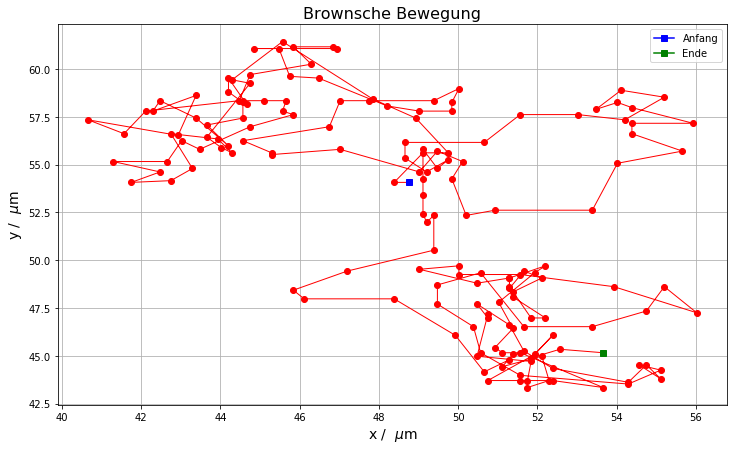

In [4]:
# Plot
plt.figure(figsize = (12,7))
plt.plot(x, y, marker = 'o', color = 'red', linewidth = 1)
plt.plot(x[0], y[0], marker = 's', color = 'blue', label = 'Anfang')
plt.plot(x[-1], y[-1], marker = 's', color = 'green', label = 'Ende')
plt.grid()
plt.xlabel('x / '+' $\mu$'+'m', size = 14)
plt.ylabel('y / '+' $\mu$'+'m', size = 14)
plt.title('Brownsche Bewegung', size = 16) 
plt.legend(loc = 'best')
plt.savefig('images/223/V223Diagramm1.png', format='png')

VIII.2 Berechnung des mittleren Verschiebungsquadrates und dessen Fehler
--

In [5]:
# Kleine Verschiebungen
dt=np.array([]) 
dx=np.array([]) 
dy=np.array([]) 
i=0

while i < len(t) - 1: 
    dt = np.append(dt, t[i + 1] - t[i]) 
    dx = np.append(dx, x[i + 1] - x[i]) 
    dy = np.append(dy, y[i + 1] - y[i]) 
    i = i + 1

r_squared = dx ** 2 + dy ** 2

# Mittelwert und Fehler
r_squared_mean = np.mean(r_squared)
r_squared_mean_std = np.std(r_squared) / sqrt(len(r_squared)) 
print("r_squared_mean =" ,np.round(r_squared_mean,2), '+/-', 
      np.round(r_squared_mean_std,2), '[(10^-6 m)^2]') 

dt_mean = np.mean(dt)
dt_mean_std = 1 / sqrt(len(dt)) * np.std(dt)
print("dt_mean =", np.round(dt_mean,3), '+/-', np.round(dt_mean_std,3), '[s]')

r_squared_mean = 1.98 +/- 0.16 [(10^-6 m)^2]
dt_mean = 1.021 +/- 0.003 [s]


In [6]:
# Bestimmung der Diffusionskonstante und Boltzmann-Konstante
eta = 9.6 # 10^-4 Pa s
sig_eta = 0.1
a = 755 / 2 # 10^-9 m
sig_a = 30 / 2
T = 295 # K
sig_T = 0.1

D = r_squared_mean / (4 * dt_mean) # 10^-12 m^2 s^-1
sig_D = sqrt((r_squared_mean_std / (4 * dt_mean)) ** 2 + 
             (r_squared_mean * dt_mean_std / (4 * dt_mean ** 2)) ** 2 )
print('D =', np.round(D,2), '+/-', np.round(sig_D, 2), '[10^-12 m^2 s^-1]')

k = 3 * pi * eta * a / (2 * T * dt_mean) * r_squared_mean # 10^-25 kg m^2 s^-2 K^-1 = J K^-1
rho_k = sqrt( (sig_eta / eta) ** 2 + (sig_a / a) ** 2 
                          + (sig_T / T) ** 2 + (dt_mean_std / dt_mean) ** 2 
                          + (r_squared_mean_std / r_squared_mean) ** 2)
sig_k = k * rho_k
print('k =', np.round(k, 0), '+/-', np.round(sig_k,0), '[10^-25 J K^-1]')

D = 0.49 +/- 0.04 [10^-12 m^2 s^-1]
k = 112.0 +/- 10.0 [10^-25 J K^-1]


VIII.3 Kontrollverteilung
--

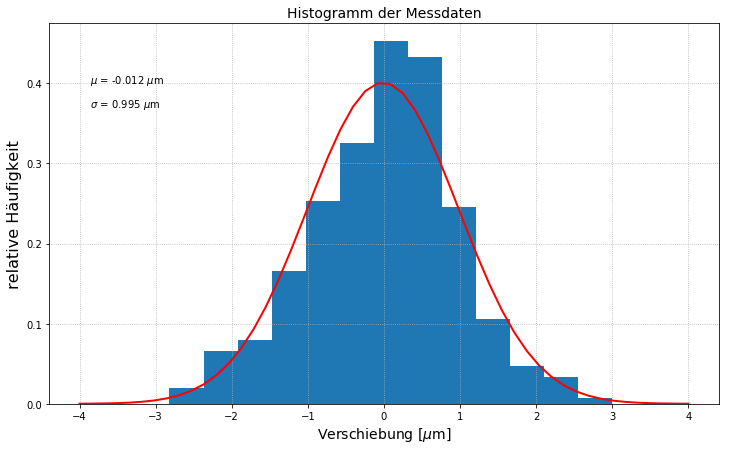

In [7]:
all_data = np.append(dx,dy) 
plt.figure(figsize = (12, 7))
plt.title('Histogramm der Messdaten', size = 14)
plt.xlabel('Verschiebung [$\mu$m]', size = 14)
plt.ylabel('relative Häufigkeit', size = 16)
plt.grid(linestyle = 'dotted')
plt.hist(all_data, density = 1, bins = 13)

# Fit
mu = np.mean(all_data)
sigma = np.std(all_data)


def gaussian(x, mu, sigma):
    return 1 / (sqrt(2 * pi * sigma**2)) * exp(- (x - mu)**2 / (2 * sigma ** 2))


gauss = gaussian(np.linspace(-4, 4), mu, sigma)
    
plt.text(-3.9, 0.4, ' $\mu$ = ' + str(np.round(mu,3)) + ' $\mu$m')
plt.text(-3.9, 0.37, ' $\sigma$ = ' + str(np.round(sigma,3)) + ' $\mu$m')

plt.plot(np.linspace(-4, 4), gauss, 'r-', linewidth = 2)
plt.savefig('images/223/V223Diagramm2.png')
plt.show()

VIII.4 Kummulative Verteilung der Verschiebungsquadrate
---

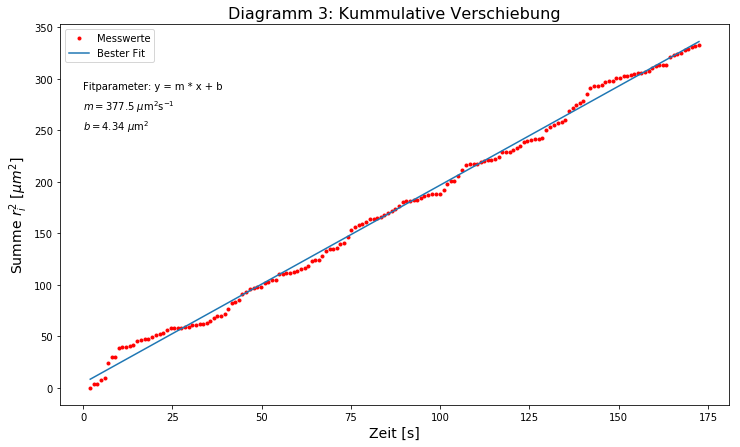

In [8]:
# Zusammenhang 
r_kumm = np.cumsum(r_squared)
plt.figure(figsize = (12, 7))
plt.plot(t[:-1], r_kumm, marker = '.', color = 'red', linewidth = 0,
        label = 'Messwerte')
plt.xlabel('Zeit [s]', size = 14)
plt.ylabel('Summe $r_i^2\ [\mu m^2]$', size = 14)
plt.title('Diagramm 3: Kummulative Verschiebung', size = 16)

# Fit
def linear(x, m, b):
    return m * x + b

popt, pcov = curve_fit(linear, t[:-1], r_kumm)


plt.plot(t[:-1], linear(t[:-1], *popt), label = 'Bester Fit')

m = popt[0]
sig_m = np.sqrt(pcov[0][0])
b = popt[1]
sig_b = np.sqrt(pcov[1][1])

plt.text(0, 290, 'Fitparameter: y = m * x + b')
plt.text(0, 270, '$m = $' + str(np.round(a, 2)) + ' $\mu$m$^2$s$^{-1}$')
plt.text(0, 250, '$b = $' + str(np.round(b, 2)) + ' $\mu$m$^2$')

plt.legend(loc = 'best')
plt.savefig('images/223/V223Diagramm3.png')

In [9]:
# Bestimmung von D und K
D_2 = m / 4 # 10^-12 m^2 s^-1
sig_D_2 = sig_m / 4 # 10^-12 m^2 s^-1
print('D_2 =', np.round(D_2,3), '+/-', np.round(sig_D_2,3),
      '[10^-12 m^2 s^-1]')

k_2 = 6 * pi * eta * a * D_2 / T
sig_k_2 = k_2 * sqrt((sig_T / T) ** 2 + (sig_eta / eta) ** 2 + (sig_a / a) ** 2 
                     + (sig_D_2 / D_2) ** 2)
print('k_2 =', np.round(k_2,0), '+/-', np.round(sig_k_2,0), 
      '[10^-25 J K^-1]')

D_2 = 0.481 +/- 0.002 [10^-12 m^2 s^-1]
k_2 = 111.0 +/- 5.0 [10^-25 J K^-1]


Sigmas
--

In [10]:
# Literturwert
k_lit = 138.0649 # 10^-25 J K^-1

In [11]:
fehler('D, D_2',D, sig_D, D_2, sig_D_2)

D, D_2
Relativer Fehler:  8.2230953786244
Rel. Fehler (Vergleich): 0.45970643377478665
Absoluter Fehler:  0.004190046441558792
Sigma-Abweichung:  0.10489893858223297 



In [12]:
fehler('k, k_2', k, sig_k, k_2, sig_k_2)

k, k_2
Relativer Fehler:  9.192077966341088
Rel. Fehler (Vergleich): 4.133561386818065
Absoluter Fehler:  0.9702555434697047
Sigma-Abweichung:  0.08584128441328072 



In [13]:
fehler('k, k_lit', k, sig_k, k_lit, 0)

k, k_lit
Relativer Fehler:  9.192077966341088
Rel. Fehler (Vergleich): 0.0
Absoluter Fehler:  25.756106856209087
Sigma-Abweichung:  2.494897790911734 



In [14]:
fehler('k_2, k_lit', k_2, sig_k_2, k_lit, 0)

k_2, k_lit
Relativer Fehler:  4.133561386818065
Rel. Fehler (Vergleich): 0.0
Absoluter Fehler:  26.72636239967879
Sigma-Abweichung:  5.807242324791667 

